In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 5 * x + 5 + np.random.normal(0, 10, size=100)

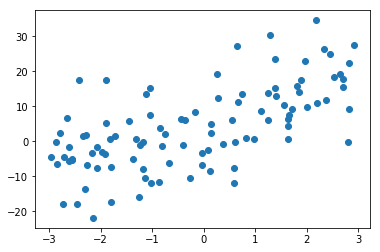

In [28]:
plt.scatter(x, y)
plt.show()

## 线性回归 LinearRegression

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [31]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

16794.010854895103

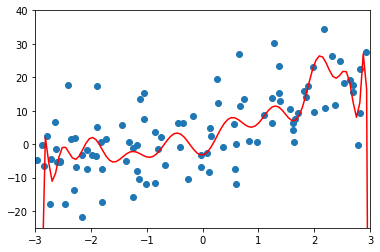

In [32]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, -25, 40])

plt.show()

## 岭回归 Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [47]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
print(mean_squared_error(y_test, y1_predict))

ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
print(mean_squared_error(y_test, y2_predict))

ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
print(mean_squared_error(y_test, y3_predict))

132.33492754055015
118.88759304218478
131.964561130862


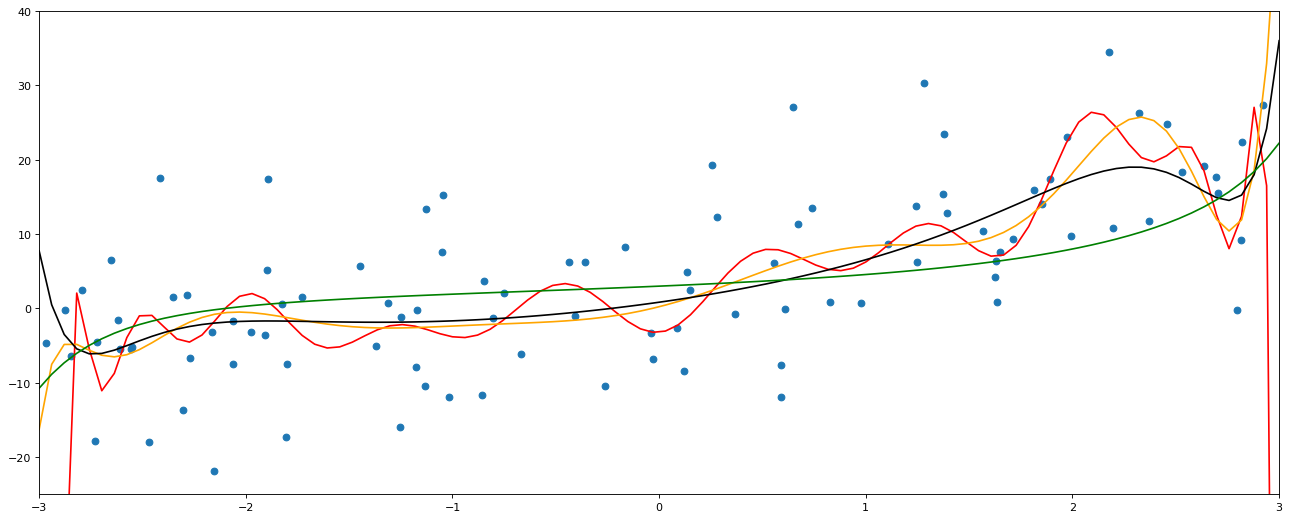

In [53]:
#设置图片大小
plt.figure(figsize=(20,8),dpi=80)

X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
plt.scatter(x, y)

y_plot = poly_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot, color='r')

y_plot = ridge1_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot, color='orange')

y_plot2 = ridge2_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot2, color='black')

y_plot3 = ridge3_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot3, color='green')

plt.axis([-3, 3, -25, 40])


plt.show()

##  LASSO Regression

In [54]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [59]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
print(mean_squared_error(y_test, y1_predict))

lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
print(mean_squared_error(y_test, y2_predict))

lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
print(mean_squared_error(y_test, y3_predict))

138.0090313315644
114.96080843259966
112.13911351818649


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


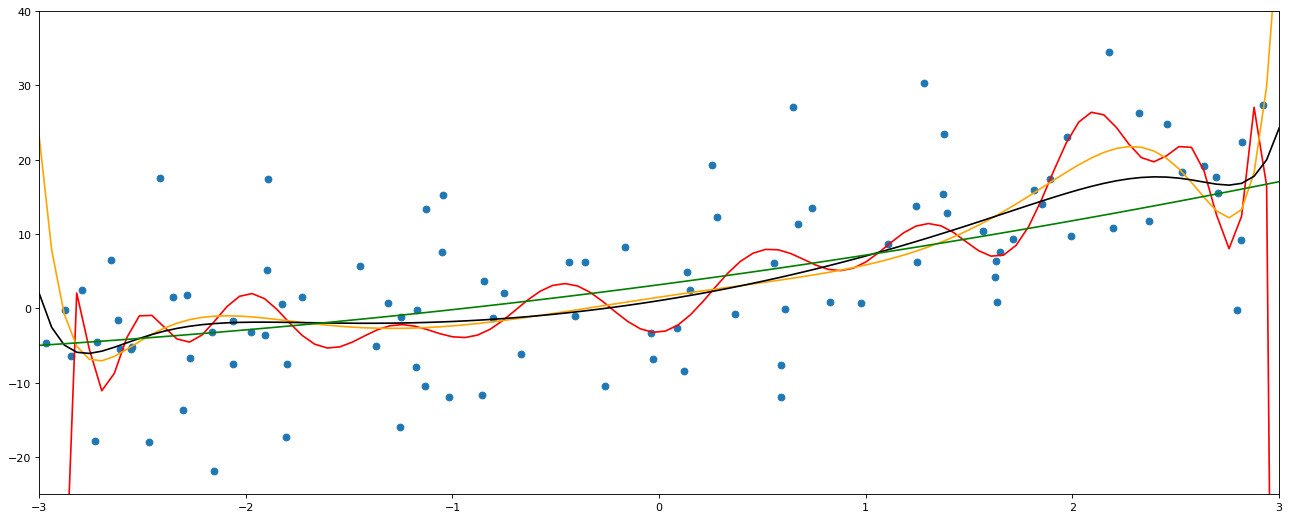

In [60]:
#设置图片大小
plt.figure(figsize=(20,8),dpi=80)

X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
plt.scatter(x, y)

y_plot = poly_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot, color='r')

y_plot = lasso1_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot, color='orange')

y_plot2 = lasso2_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot2, color='black')

y_plot3 = lasso3_reg.predict(X_plot)
plt.plot(X_plot[:,0], y_plot3, color='green')

plt.axis([-3, 3, -25, 40])


plt.show()

In [69]:
print(ridge1_reg.get_params()["ridge_reg"].coef_)
print(ridge2_reg.get_params()["ridge_reg"].coef_)
print(ridge3_reg.get_params()["ridge_reg"].coef_)

[   0.           11.88865668   17.25783866  -12.43395042 -110.28918152
  -45.53438977  251.62823379  149.19075298  -93.94145635  -21.03093769
 -142.92936133 -108.79331113  -26.55410383  -49.24403465   64.62147501
   43.38902554   70.57866878   65.45339595   17.25647769  -25.33754814
  -45.87205104]
[ 0.          6.61710741  3.81067797  1.64373257  2.84888081  1.26685919
 -0.31316034 -0.08100803 -2.70732016 -1.33583725 -3.59000021 -1.88315592
 -3.19430653 -1.64769099 -1.89678257 -0.75167075 -0.00797531  0.64725604
  2.24988234  2.40924206  4.72339697]
[ 0.          2.00600012  0.59216731  1.17659949  0.27670107  0.70691378
  0.08428699  0.43747098 -0.01602777  0.2758532  -0.05785174  0.17836495
 -0.0642838   0.12146297 -0.04951987  0.09128952 -0.02217447  0.07923295
  0.01245422  0.079724    0.05103693]


In [70]:
print(lasso1_reg.get_params()["lasso_reg"].coef_)
print(lasso2_reg.get_params()["lasso_reg"].coef_)
print(lasso3_reg.get_params()["lasso_reg"].coef_)

[  0.           6.96830373  -1.40069747  -1.43214638  16.12508031
   7.85715732   0.47801639   0.          -8.89046855  -2.18668086
 -12.53509559  -7.29138715  -3.21078124  -1.9981118   -0.
  -0.          -0.          -0.           0.49023252   4.80609934
  11.06246384]
[ 0.          7.4329711   4.14818814  0.          0.         -0.
 -0.         -0.         -0.         -0.         -5.19776033 -0.36838835
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.          2.79089368]
[0.         6.18877504 0.82134895 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
